In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [3]:
files = glob.glob("*.csv")
print("Files:", files)
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
print("Dataset size (rows, cols):", df.shape)
df.head()


Files: ['2025-11-metropolitan-street.csv', '2025-10-metropolitan-street.csv', '2025-09-metropolitan-street.csv']
Dataset size (rows, cols): (286034, 12)


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,7ace75497d3048495216d818b91faf8ee23e4db6937219...,2025-11,Metropolitan Police Service,Metropolitan Police Service,-0.238783,50.843196,On or near Queens Road,E01031352,Adur 001D,Violence and sexual offences,Under investigation,NaN
1,b5489a8a750b1aa999ea034287f8ffd9550ab811056861...,2025-11,Metropolitan Police Service,Metropolitan Police Service,-1.473018,53.052750,On or near Newbridge Road,E01019430,Amber Valley 007D,Violence and sexual offences,Under investigation,NaN
2,b99623a3c441ad45acf7ee24150e2c50e75fd03b27e91e...,2025-11,Metropolitan Police Service,Metropolitan Police Service,-0.584161,50.818113,On or near Park/Open Space,E01031470,Arun 006A,Vehicle crime,Investigation complete; no suspect identified,NaN
3,edd7b1edf25f3648ad1474de9bc448efaeb8263a073e74...,2025-11,Metropolitan Police Service,Metropolitan Police Service,-0.580098,50.819161,On or near Nelson Row,E01031470,Arun 006A,Violence and sexual offences,Under investigation,NaN
4,ec852c10f589eba3396d648fa8f2cbf1bd10235d30e56f...,2025-11,Metropolitan Police Service,Metropolitan Police Service,0.988599,51.252893,On or near Shalmsford Road,E01023988,Ashford 001C,Possession of weapons,Under investigation,NaN


In [5]:
print(df.columns)
print(df["Month"].value_counts().head(10))

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')
Month
2025-10    98545
2025-11    94209
2025-09    93280
Name: count, dtype: int64


In [6]:
df = df[["Month", "LSOA name", "Crime type"]]
df.head()

,Month,LSOA name,Crime type
0,2025-11,Adur 001D,Violence and sexual offences
1,2025-11,Amber Valley 007D,Violence and sexual offences
2,2025-11,Arun 006A,Vehicle crime
3,2025-11,Arun 006A,Violence and sexual offences
4,2025-11,Ashford 001C,Possession of weapons


In [8]:
df = df.dropna()
df["Month"] = pd.to_datetime(df["Month"])
print("After cleaning:", df.shape)
df.head()

After cleaning: (286034, 3)


,Month,LSOA name,Crime type
0,2025-11-01,Adur 001D,Violence and sexual offences
1,2025-11-01,Amber Valley 007D,Violence and sexual offences
2,2025-11-01,Arun 006A,Vehicle crime
3,2025-11-01,Arun 006A,Violence and sexual offences
4,2025-11-01,Ashford 001C,Possession of weapons


In [9]:
lsoa_counts = df.groupby("LSOA name").size().reset_index(name="crime_count")
lsoa_counts = lsoa_counts.sort_values("crime_count", ascending=False)

In [10]:
lsoa_counts["cum_crime"] = lsoa_counts["crime_count"].cumsum()
total_crime = lsoa_counts["crime_count"].sum()
lsoa_counts["cum_crime_pct"] = lsoa_counts["cum_crime"] / total_crime
lsoa_counts["location_pct"] = (lsoa_counts.reset_index().index + 1) / len(lsoa_counts)

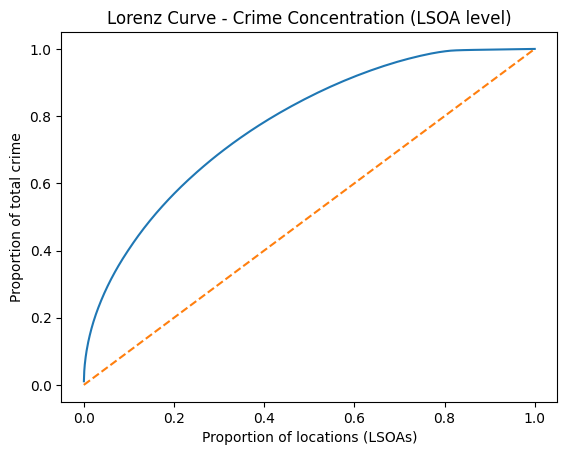

In [11]:
plt.plot(lsoa_counts["location_pct"], lsoa_counts["cum_crime_pct"])
plt.plot([0,1],[0,1],"--")
plt.xlabel("Proportion of locations (LSOAs)")
plt.ylabel("Proportion of total crime")
plt.title("Lorenz Curve - Crime Concentration (LSOA level)")
plt.savefig("lorenz_curve_lsoa.png", dpi=200)
plt.show()

In [12]:
top_5_percent = int(len(lsoa_counts) * 0.05)
crime_top_5 = lsoa_counts.head(top_5_percent)["crime_count"].sum()
crime_total = lsoa_counts["crime_count"].sum()
share = (crime_top_5 / crime_total) * 100
print("Top 5% of LSOAs account for:", round(share, 2), "% of all crimes.")

Top 5% of LSOAs account for: 28.63 % of all crimes.
